In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.io import loadmat
import os

from sparse_coding import SparseCodingModel
from sparse_coding_utils import get_natural_images, get_mnist_images, create_patchwork

from helmholtz import helmholtz
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.animation as animation

In [2]:
if "IMAGES.mat" not in os.listdir():
    !wget https://github.com/hmallen99/vs265_files/raw/master/IMAGES.mat
img_mat = loadmat("IMAGES.mat")["IMAGES"]
X = get_natural_images(img_mat, 28)

In [3]:
nat_model = SparseCodingModel(100, 400, 0.01)
nat_model.load_Phi("nat_features17.npy")

In [4]:
num2_images = get_mnist_images(number=2)[:20]
num2_activations = nat_model.predict(num2_images)

In [5]:
nat_helmholtz = helmholtz([400, 512], 'beta', .05)

for i in tqdm(range(4)):
    nat_helmholtz.train(num2_activations[:, i].reshape(1, -1))

(400, 512)
(512, 1)
100%|██████████| 4/4 [00:27<00:00,  6.76s/it]


In [6]:
len(nat_helmholtz.dreams)

4000

100%|██████████| 40/40 [00:00<00:00, 890.93it/s]
Animation Creation Started
MovieWriter ffmpeg unavailable. Trying to use pillow instead.
Animation Creation Finished


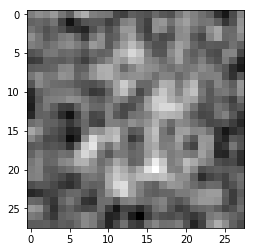

In [7]:
frames = [] 
fig = plt.figure()
for dream in tqdm(nat_helmholtz.dreams[::100]):
    dream = nat_model.generate(dream).reshape(28, 28)
    frames.append([plt.imshow(dream, animated=True)])

print('Animation Creation Started')
ani = animation.ArtistAnimation(fig, frames, interval=10, blit=True)
ani.save('faces_dreaming_2.gif')
print('Animation Creation Finished')

plt.show()